<a href="https://colab.research.google.com/github/epjonnadula/Deep-Learning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sys

In [0]:
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
x=bos.RM
y=boston.target
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)
x=x/np.mean(x)
y=y/np.mean(y)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3,shuffle=True)
m=np.shape(train_x)[0]
train_x=np.nan_to_num(train_x)
train_y=np.nan_to_num(train_y)
ones=np.ones((m,1))
train_x=np.append(ones,train_x,axis=1)
n=np.shape(train_x)[1]

In [0]:
#dataset_train=pd.read_csv('https://raw.githubusercontent.com/eshwarprithvi/Deep-Learning/master/Linear_Regression/train.csv')
#dataset_test=pd.read_csv('https://raw.githubusercontent.com/eshwarprithvi/Deep-Learning/master/Linear_Regression/test.csv')

In [0]:
def hypothesis(theta,x):
    return np.matmul(x,theta)

In [0]:
def cost(calculated,actual):
    diff=np.subtract(calculated,actual)
    val=np.matmul(np.transpose(diff),diff)[0][0]
    val=val/(2*m)
    return val

In [0]:
def gradient_descent(calculated,actual,x,alpha,theta):
    diff=np.subtract(calculated,actual)
    grad=np.matmul(np.transpose(diff),x)
    grads=alpha*(np.transpose(grad)/np.shape(x)[0])
    theta=np.subtract(theta,grads)
    return theta

In [7]:
'''
itrs=200000
cost_list=[]
theta=np.zeros((n,1))
for i in range(itrs):
    calculated=hypothesis(theta,train_x)
    cost_val=cost(calculated,train_y)
    theta=gradient_descent(calculated,train_y,train_x,0.001,theta)
    cost_list.append(cost_val)
'''

'\nitrs=200000\ncost_list=[]\ntheta=np.zeros((n,1))\nfor i in range(itrs):\n    calculated=hypothesis(theta,train_x)\n    cost_val=cost(calculated,train_y)\n    theta=gradient_descent(calculated,train_y,train_x,0.001,theta)\n    cost_list.append(cost_val)\n'

In [8]:
prev_cost=sys.maxsize
cost_list=[]
epsilon=0.00000001
theta=np.zeros((n,1))
while True:
    calculated=hypothesis(theta,train_x)
    cost_val=cost(calculated,train_y)
    theta=gradient_descent(calculated,train_y,train_x,0.001,theta)
    cost_list.append(cost_val)
    if np.abs(cost_val-prev_cost)<=epsilon:
        break
    else:
        prev_cost=cost_val
    if len(cost_list)%1000==0:
        print("Iteration ",len(cost_list))

Iteration  1000
Iteration  2000
Iteration  3000
Iteration  4000
Iteration  5000
Iteration  6000
Iteration  7000
Iteration  8000
Iteration  9000
Iteration  10000
Iteration  11000
Iteration  12000
Iteration  13000
Iteration  14000
Iteration  15000
Iteration  16000
Iteration  17000
Iteration  18000
Iteration  19000
Iteration  20000
Iteration  21000
Iteration  22000
Iteration  23000
Iteration  24000
Iteration  25000
Iteration  26000
Iteration  27000
Iteration  28000
Iteration  29000
Iteration  30000
Iteration  31000
Iteration  32000
Iteration  33000
Iteration  34000
Iteration  35000
Iteration  36000
Iteration  37000
Iteration  38000
Iteration  39000
Iteration  40000
Iteration  41000
Iteration  42000
Iteration  43000
Iteration  44000
Iteration  45000
Iteration  46000
Iteration  47000
Iteration  48000
Iteration  49000
Iteration  50000
Iteration  51000
Iteration  52000
Iteration  53000
Iteration  54000
Iteration  55000
Iteration  56000
Iteration  57000
Iteration  58000
Iteration  59000
Iterat

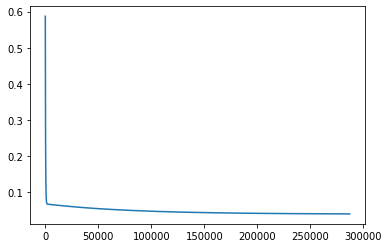

Training Cost= 0.039847069846131886


In [9]:
plt.plot(range(0,len(cost_list)),cost_list)
plt.show()
print("Training Cost=",cost_list[-1])

In [0]:
m=np.shape(test_x)[0]
test_x=np.nan_to_num(test_x)
test_y=np.nan_to_num(test_y)
ones=np.ones((m,1))
test_x=np.append(ones,test_x,axis=1)
n=np.shape(test_x)[1]

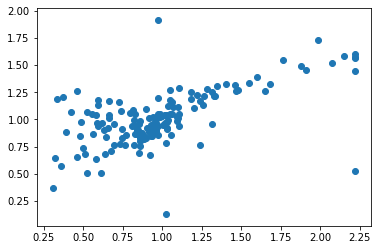

Test Cost= 0.051530599678154626


In [11]:
calculated=hypothesis(theta,test_x)
plt.scatter(test_y,calculated)
plt.show()
cost_val=cost(calculated,test_y)
print("Test Cost=",cost_val)

In [12]:
reg = LinearRegression()
reg.fit(train_x, train_y)
predict_y = reg.predict(test_x)

print("Testing Cost",cost(predict_y,test_y))

Testing Cost 0.05233820300172104
